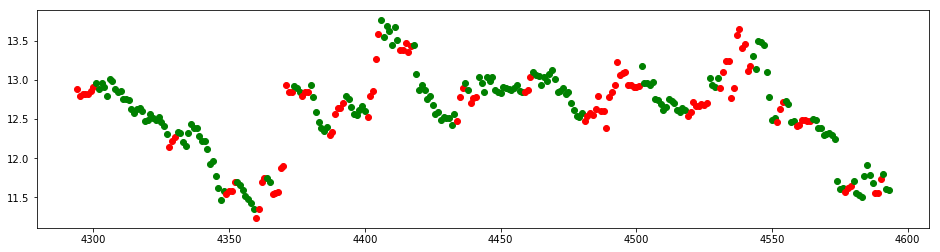

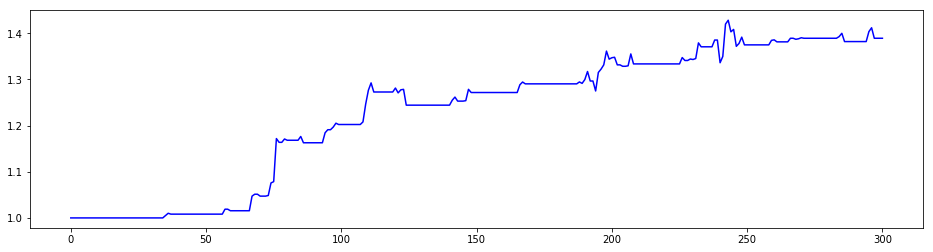

In [2]:
# Viterbi Algorithm(隐序列推测)
# O(Obvious-line):      the Obvious-line we got at last step 
# LM(Launch Matrix):    a 2*2 matrix to save launch probability
# CM(Change Matrix):    a 2*2 matrix to save change probability

import numpy as np

def Viterbi(O,LM,CM):
    LM = np.log(LM)
    CM = np.log(CM)
    pi=[[1,1]]
    for i in range (1,len(O)):
        pi.append([0,0])
        if O[i] == "R":
            pi[i][0] = LM[0][0]+max(pi[i-1][0]+CM[0][0],pi[i-1][1]+CM[1][0])
            pi[i][1] = LM[1][0]+max(pi[i-1][0]+CM[0][1],pi[i-1][1]+CM[1][1])
        else:
            pi[i][0] = LM[0][1]+max(pi[i-1][0]+CM[0][0],pi[i-1][1]+CM[1][0])
            pi[i][1] = LM[1][1]+max(pi[i-1][0]+CM[0][1],pi[i-1][1]+CM[1][1])
    
    if pi[len(O)-1][0] >= pi[len(O)-1][1]:
        H = "U";pr_H = "U"
    else:
        H = "D";pr_H = "D"
    
    for i in range (len(O)-2,-1,-1):
        if pr_H == "D":
            if pi[i][0]+CM[0][1] > pi[i][1]+CM[1][1]:
                pr_H="U"
            else:
                pr_H="D"
        if pr_H=="U":
            if pi[i][0]+CM[0][0] > pi[i][1]+CM[1][0]:
                pr_H="U"
            else:
                pr_H="D"
        H=pr_H+H
        
    return H

import csv
Data = []
with open('600000.csv','rb') as ff:
    reader = csv.reader(ff)
    for row in reader:
        Data.append(row)
O = ""
Price = []
Rate0 = []
for i in range(len(Data)-2):
    if(Data[i+2][4]!="null" and Data[i+1][4]!="null"):
        Price.append(Data[i+1][4])
        Rate0.append(float(Data[i+2][4])/float(Data[i+1][4]))
        if (float(Data[i+2][4])-float(Data[i+1][4])>=0):
            O = O + "R"
        else:
            O = O + "G"
            
import matplotlib.pyplot as plt
days = 300
Hdline = Viterbi(O,[[0.6, 0.4], [0.4, 0.6]],[[0.6, 0.4], [0.4, 0.6]])
fig, ax = plt.subplots(figsize=(16, 4))
for i in range (len(O)-days-1,len(O)-1):
    if Hdline[i] == "U":
        ax.plot([i],[Price[i]],'ro')
    elif Hdline[i] == "D":
        ax.plot([i],[Price[i]],'go')
plt.show()
#图像化显示计算出的涨跌区间

fig, ax = plt.subplots(figsize=(16, 4))
Price_my = [1]
flag = False
for i in range (len(O)-days,len(O)):
    if flag == False:
        Price_my.append(Price_my[len(Price_my)-1]*1.0)
    else:
        Price_my.append(Price_my[len(Price_my)-1]*Rate0[i])
    if Hdline[i-1] == "U" and  Hdline[i] == "D":
        flag = False
    elif Hdline[i-1] == "D" and Hdline[i] == "U":
        flag = True
ax.plot(Price_my,'b')
#Price_my = [1]
#for i in range (1,len(O[0:days])+1):
#    if O[i] == 'R':
#        Price_my.append(Price_my[len(Price_my)-1]*Rate0[i])
#    else:
#        Price_my.append(Price_my[len(Price_my)-1]*1.0)
#ax.plot(Price_my,'k')
plt.show()
#依照此涨跌去购买的收益曲线

In [37]:
import csv

def F(x):
    if x == 'U':
        return 0
    else:
        return 1
    
def f(x):
    if x == 'R':
        return 0
    else:
        return 1
def right(O,Hdline):
    t_num=0
    f_num=0
    for i in range(len(O)-days,len(O)):
        if f(O[i]) == F(Hdline[i]):
            t_num=t_num+1
        else:
            f_num=f_num+1
    return float(t_num)/float(f_num+t_num)

def result(f_list):
    print("%-15s %-15s %-15s %-15s"%("股票代码","投资收益","实际涨幅","准确率"))
    for i in range (len(f_list)):
        main(f_list[i])

def main(filename):
    Data = []
    with open(filename,'rb') as ff:
        reader = csv.reader(ff)
        for row in reader:
            Data.append(row)
    O = ""
    Price = []
    Rate0 = []
    for i in range(len(Data)-2):
        if(Data[i+2][4]!="null" and Data[i+1][4]!="null"):
            Price.append(Data[i+1][4])
            Rate0.append(float(Data[i+2][4])/float(Data[i+1][4]))
            if (float(Data[i+2][4])-float(Data[i+1][4])>=0):
                O = O + "R"
            else:
                O = O + "G"
            
    days = 300
    Hdline = Viterbi(O,[[0.6, 0.4], [0.4, 0.6]],[[0.6, 0.4], [0.4, 0.6]])

    Price_my = 1
    flag = False
    for i in range (len(Price)-days,len(Price)):
        if flag == False:
            Price_my = Price_my*1.0
        else:
            Price_my = Price_my*Rate0[i]
        if Hdline[i-1] == "U" and  Hdline[i] == "D":
            flag = False
        elif Hdline[i-1] == "D" and Hdline[i] == "U":
            flag = True
    print("%-11.6s %-11.2f %-11.2f %-11.2f"%(filename,round(Price_my,2),
                                             float(Price[len(Price)-1])/float(Price[len(Price)-1-days]),right(O,Hdline)))

In [38]:
result(['600000.csv','600016.csv','600028.csv','600029.csv','600030.csv',
       '600036.csv','600048.csv','600050.csv','600100.csv','600104.csv',
       '600109.csv','600111.csv','600406.csv','600518.csv','600519.csv',
       '600547.csv','600637.csv','600837.csv','600887.csv','600893.csv',
       '600958.csv','600999.csv','601006.csv','601088.csv','601166.csv',
       '601169.csv','601186.csv','601198.csv','601211.csv','601288.csv',
       '601318.csv','601328.csv','601336.csv','601377.csv','601390.csv',
       '601398.csv','601601.csv','601628.csv','601668.csv','601688.csv',
       '601766.csv','601788.csv','601800.csv','601818.csv','601857.csv',
       '601901.csv','601985.csv','601988.csv','601989.csv','601998.csv'])

股票代码    投资收益    实际涨幅    准确率      
600000      1.39        0.91        0.77       
600016      1.54        0.85        0.79       
600028      1.84        1.15        0.80       
600029      2.41        1.34        0.76       
600030      1.74        1.17        0.76       
600036      2.56        1.52        0.81       
600048      2.76        1.53        0.81       
600050      1.71        0.87        0.84       
600100      1.30        0.82        0.85       
600104      2.08        1.26        0.80       
600109      1.66        0.64        0.79       
600111      2.31        1.03        0.75       
600406      1.19        1.03        0.82       
600518      1.71        1.05        0.79       
600519      2.32        2.00        0.79       
600547      1.56        0.77        0.81       
600637      1.40        0.74        0.77       
600837      1.38        0.71        0.75       
600887      2.53        1.58        0.81       
600893      2.21        0.80        0.79       
600958